# Preparation

In [ ]:
cd '/content/drive/MyDrive/Colab Notebooks/AI・データサイエンス実践プログラム/機械学習_実装テスト'

/content/drive/MyDrive/Colab Notebooks/AI・データサイエンス実践プログラム/機械学習_実装テスト


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
d_train = pd.read_csv('bank.csv')
d_test = pd.read_csv('bank_pred.csv')

In [ ]:
d_train

,age,job,marital,education,default,balance,housing,loan,pdays,previous,poutcome,result
0,55.0,self-employed,married,tertiary,no,1810,yes,no,-1.0,0,unknown,fail
1,54.0,management,married,tertiary,no,364,yes,no,-1.0,0,unknown,fail
2,35.0,technician,married,secondary,no,-180,no,yes,-1.0,0,unknown,success
3,58.0,retired,married,primary,no,69,no,no,-1.0,0,unknown,fail
4,48.0,management,married,tertiary,no,2351,no,no,105.0,3,success,success
...,...,...,...,...,...,...,...,...,...,...,...,...
14995,40.0,blue-collar,divorced,secondary,no,-244,yes,no,-1.0,0,unknown,fail
14996,53.0,self-employed,married,tertiary,no,730,yes,no,368.0,2,failure,fail
14997,31.0,management,married,tertiary,no,898,no,no,-1.0,0,unknown,fail
14998,49.0,blue-collar,married,primary,no,6429,no,no,-1.0,0,unknown,fail


In [ ]:
d_test

,age,job,marital,education,default,balance,housing,loan,pdays,previous,poutcome
0,53,services,married,secondary,no,1364,no,no,-1,0,unknown
1,36,blue-collar,married,secondary,no,1949,yes,no,319,3,failure
2,40,admin.,married,unknown,no,3557,yes,no,-1,0,unknown
3,51,management,divorced,secondary,no,-175,yes,yes,-1,0,unknown
4,41,unemployed,married,secondary,no,277,yes,no,351,2,failure
...,...,...,...,...,...,...,...,...,...,...,...
9995,34,entrepreneur,married,tertiary,no,1076,yes,no,-1,0,unknown
9996,53,technician,divorced,primary,no,-834,yes,yes,-1,0,unknown
9997,42,technician,divorced,secondary,no,324,yes,no,-1,0,unknown
9998,38,management,single,tertiary,no,231,no,no,-1,0,unknown


In [ ]:
d_train['result'] = d_train['result'].map({'fail': 0, 'success': 1})

# Data Analysis

In [ ]:
d_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        14965 non-null  float64
 1   job        14992 non-null  object 
 2   marital    14955 non-null  object 
 3   education  15000 non-null  object 
 4   default    14938 non-null  object 
 5   balance    15000 non-null  int64  
 6   housing    14886 non-null  object 
 7   loan       14976 non-null  object 
 8   pdays      14921 non-null  float64
 9   previous   15000 non-null  int64  
 10  poutcome   14848 non-null  object 
 11  result     15000 non-null  int64  
dtypes: float64(2), int64(3), object(7)
memory usage: 1.4+ MB


In [ ]:
d_train.describe()

,age,balance,pdays,previous,result
count,14965.000000,15000.000000,14921.000000,15000.000000,15000.000000
mean,40.957701,1359.111600,41.122914,0.565267,0.117200
std,10.618818,2975.221144,100.577961,1.753077,0.321669
min,18.000000,-6847.000000,-1.000000,0.000000,0.000000
25%,33.000000,71.000000,-1.000000,0.000000,0.000000
50%,39.000000,447.000000,-1.000000,0.000000,0.000000
75%,48.000000,1409.250000,-1.000000,0.000000,0.000000
max,95.000000,66721.000000,838.000000,29.000000,1.000000


In [ ]:
d_train.select_dtypes([np.number]).corr()

,age,balance,pdays,previous,result
age,1.000000,0.094576,-0.032872,0.001766,0.005577
balance,0.094576,1.000000,0.006661,0.020339,0.043531
pdays,-0.032872,0.006661,1.000000,0.564509,0.091786
previous,0.001766,0.020339,0.564509,1.000000,0.108802
result,0.005577,0.043531,0.091786,0.108802,1.000000


In [ ]:
# データフレームから object 型の列のみを選択
object_columns = d_train.select_dtypes(include=['object'])

# 各 object 型の列についてユニークな値のリストを取得
unique_values = {column: object_columns[column].unique() for column in object_columns}

# 結果を表示
display(unique_values)

{'job': array(['self-employed', 'management', 'technician', 'retired',
        'unemployed', 'blue-collar', 'services', 'admin.', 'entrepreneur',
        'student', 'housemaid', 'unknown', nan], dtype=object),
 'marital': array(['married', 'divorced', 'single', nan], dtype=object),
 'education': array(['tertiary', 'secondary', 'primary', 'unknown'], dtype=object),
 'default': array(['no', 'yes', nan], dtype=object),
 'housing': array(['yes', 'no', nan], dtype=object),
 'loan': array(['no', 'yes', nan], dtype=object),
 'poutcome': array(['unknown', 'success', 'failure', 'other', nan], dtype=object)}

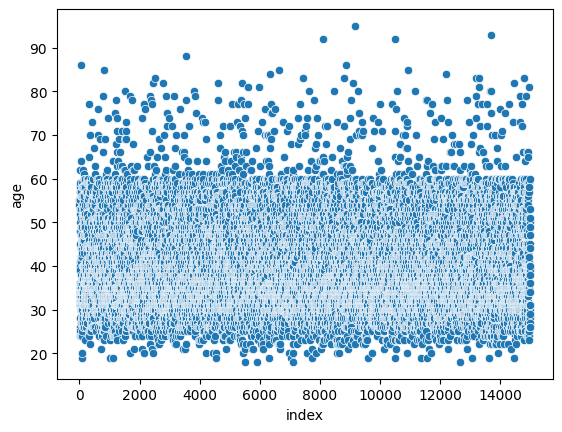

In [ ]:
d_train_reset = d_train.reset_index()
sns.scatterplot(x = 'index', y = 'age', data = d_train_reset);

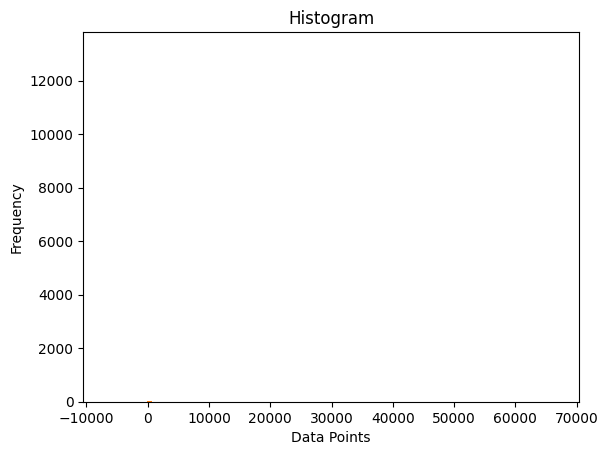

In [ ]:
plt.hist(d_train.select_dtypes(include=[np.number]).values, bins='auto')  # binsでビンの数を指定
plt.title("Histogram")
plt.xlabel("Data Points")
plt.ylabel("Frequency")
plt.show()

In [ ]:
d_train['job'].unique()

array(['self-employed', 'management', 'technician', 'retired',
       'unemployed', 'blue-collar', 'services', 'admin.', 'entrepreneur',
       'student', 'housemaid', 'unknown', nan], dtype=object)

# Data Processing

## 欠損値処理

In [ ]:
d_train_no_null = d_train.dropna()
d_test_no_null = d_test.dropna()

In [ ]:
d_train_no_null.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
pdays        0
previous     0
poutcome     0
result       0
dtype: int64

## OneHot Encoding

In [ ]:
d_train_to_onehot = d_train_no_null
d_test_to_onehot = d_test_no_null

In [ ]:
d_train_objects = d_train_to_onehot.select_dtypes(include = 'object')
d_train_numbers = d_train_to_onehot.select_dtypes(include = 'number')
d_test_objects = d_test_to_onehot.select_dtypes(include = 'object')
d_tets_numbers = d_test_to_onehot.select_dtypes(include = 'number')

In [ ]:
columns_objects = d_train_objects.columns
d_train_encoded = pd.get_dummies(d_train_to_onehot, columns=columns_objects, dtype=int)
columns_objects = d_test_objects.columns
d_test_encoded = pd.get_dummies(d_test_to_onehot, columns=columns_objects, dtype=int)

In [ ]:
d_train_encoded

,age,balance,pdays,previous,result,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,...,default_no,default_yes,housing_no,housing_yes,loan_no,loan_yes,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,55.0,1810,-1.0,0,0,0,0,0,0,0,...,1,0,0,1,1,0,0,0,0,1
1,54.0,364,-1.0,0,0,0,0,0,0,1,...,1,0,0,1,1,0,0,0,0,1
2,35.0,-180,-1.0,0,1,0,0,0,0,0,...,1,0,1,0,0,1,0,0,0,1
3,58.0,69,-1.0,0,0,0,0,0,0,0,...,1,0,1,0,1,0,0,0,0,1
4,48.0,2351,105.0,3,1,0,0,0,0,1,...,1,0,1,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,40.0,-244,-1.0,0,0,0,1,0,0,0,...,1,0,0,1,1,0,0,0,0,1
14996,53.0,730,368.0,2,0,0,0,0,0,0,...,1,0,0,1,1,0,1,0,0,0
14997,31.0,898,-1.0,0,0,0,0,0,0,1,...,1,0,1,0,1,0,0,0,0,1
14998,49.0,6429,-1.0,0,0,0,1,0,0,0,...,1,0,1,0,1,0,0,0,0,1


In [ ]:
d_train_encoded.isnull().sum()

age                    0
balance                0
pdays                  0
previous               0
result                 0
job_admin.             0
job_blue-collar        0
job_entrepreneur       0
job_housemaid          0
job_management         0
job_retired            0
job_self-employed      0
job_services           0
job_student            0
job_technician         0
job_unemployed         0
job_unknown            0
marital_divorced       0
marital_married        0
marital_single         0
education_primary      0
education_secondary    0
education_tertiary     0
education_unknown      0
default_no             0
default_yes            0
housing_no             0
housing_yes            0
loan_no                0
loan_yes               0
poutcome_failure       0
poutcome_other         0
poutcome_success       0
poutcome_unknown       0
dtype: int64

# Data Split

In [ ]:
d_train_use = d_train_encoded
d_test_use = d_test_encoded

In [ ]:
x = d_train_use.drop('result', axis = 1).values
t = d_train_use['result'].values

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train_val, x_test, t_train_val, t_test = train_test_split(x, t, test_size=0.2, random_state=1)

In [ ]:
x_train, x_train_dev, t_train, t_train_dev = train_test_split(x_train_val, t_train_val, test_size=0.2, random_state=1)

# Logistic Regression

In [ ]:
# モデルの定義
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()

In [ ]:
# GridSearchCV クラスのインポート
from sklearn.model_selection import GridSearchCV

In [ ]:
# 学習に使用するアルゴリズムの定義
estimator = log_reg

In [ ]:
param_grid = [{
    'C': [1, 10, 100, 1000, 1e5]
}]

cv = 5

In [ ]:
# GridSearchCV クラスを用いたモデルの定義
tuned_model = GridSearchCV(estimator=estimator,
                           param_grid=param_grid,
                           cv=cv, return_train_score=False)

In [ ]:
# モデルの学習＆検証
tuned_model.fit(x_train_val, t_train_val)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid=[{'C': [1, 10, 100, 1000, 100000.0]}])

In [ ]:
# 検証結果の確認
pd.DataFrame(tuned_model.cv_results_).T

,0,1,2,3,4
mean_fit_time,0.158818,0.147497,0.151136,0.220861,0.303251
std_fit_time,0.015732,0.014142,0.008072,0.081712,0.024734
mean_score_time,0.001951,0.001916,0.00255,0.00272,0.00365
std_score_time,0.000346,0.000326,0.001415,0.001676,0.001793
param_C,1,10,100,1000,100000.0
params,{'C': 1},{'C': 10},{'C': 100},{'C': 1000},{'C': 100000.0}
split0_test_score,0.889512,0.883038,0.889944,0.890807,0.889944
split1_test_score,0.882175,0.885196,0.884333,0.882607,0.882175
split2_test_score,0.893828,0.89167,0.89167,0.89167,0.89167
split3_test_score,0.88606,0.885628,0.885628,0.884333,0.885628


In [ ]:
# 最も予測精度の高かったハイパーパラメータの確認
tuned_model.best_params_

{'C': 1}

In [ ]:
# 最も予測精度の高かったモデルの引き継ぎ
best_model = tuned_model.best_estimator_

# モデルの検証
print(best_model.score(x_train_val, t_train_val))
print(best_model.score(x_test, t_test))

0.8884764782045749
0.8809112875388333


In [ ]:
y_pred = best_model.predict(d_test_use)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


In [ ]:
# 推論結果を、 success, fail に書き換える
y_list = []
for y in y_pred:
  if y == 0:
    # f = y.replace(0, 'fail')
    f = 'fail'
    y_list.append(f)
  else:
    # s = y.replace(1, 'success')
    s = 'success'
    y_list.append(s)

In [ ]:
pd.Series(y_list, name='pred').to_csv('submission.csv', index=None)

In [ ]:
from sklearn import metrics

In [ ]:
y_pred_train = best_model.predict(x_train_val)

(11585,)

In [ ]:
# 混同行列の作成
labels = list(set())
c_matrix = metrics.confusion_matrix(t_train_dev, y_pred_train, labels=labels)

ValueError: Found input variables with inconsistent numbers of samples: [2317, 11585]